# Exploratory Data Analysis

In [42]:
import pandas as pd
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns

## Biden_df

In [ ]:
# read biden csv file
biden_df = pd.read_csv(r"C:\Users\User\iCloudDrive\Cursos\Data Circle\DataCircle_Twitter_Project\hashtag_joebiden.csv", engine="python")

In [5]:
# show biden csv first 5 rows
biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.3040364,-109.17143119999999,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.7014631,-118.75599740000001,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [4]:
# show biden csv info (row qty, columns format, null values)
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777073 entries, 0 to 777072
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   source                776182 non-null  object 
 6   user_id               776889 non-null  object 
 7   user_name             776870 non-null  object 
 8   user_screen_name      776895 non-null  object 
 9   user_description      694882 non-null  object 
 10  user_join_date        776784 non-null  object 
 11  user_followers_count  776885 non-null  object 
 12  user_location         543063 non-null  object 
 13  lat                   355284 non-null  object 
 14  long                  355284 non-null  object 
 15  

In [5]:
# sum of null values for each column
biden_df.isna().sum()

created_at                   0
tweet_id                    78
tweet                       78
likes                      159
retweet_count              178
source                     891
user_id                    184
user_name                  203
user_screen_name           178
user_description         82191
user_join_date             289
user_followers_count       188
user_location           234010
lat                     421789
long                    421789
city                    590204
country                 423303
continent               423285
state                   516882
state_code              532470
collected_at               296
dtype: int64

In [8]:
# biden csv statistics 
biden_df.describe()

,retweet_count
count,7.768950e+05
mean,1.651482e+12
std,1.455644e+15
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.283028e+18


In [9]:
# total number of duplicates
biden_df.duplicated().sum()

68

In [6]:
# filter duplicated rows
biden_df[(biden_df.duplicated())]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
22101,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
36630,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
36633,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
36640,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39910,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700203,SEGUROS. BROKER ASOCIADO,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
725068,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
733302,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
734563,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
# filter duplicated rows where "tweet_id" is not null - to check if there is any duplicated rows with tweet id different than null
biden_df[(biden_df.duplicated()) & (biden_df["tweet_id"].notna())]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at


In [7]:
# Function to count values in each column
def columns_value_counts(df):
    value_counts = {}
    for column in df.columns:
        value_counts[column] = df[column].value_counts()
    return value_counts

In [8]:
# Apply Function to count values in each column
value_counts = columns_value_counts(biden_df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print("\n")

Column: created_at
created_at
Reparations Remedies Much!                   68
HateN on Obama  #StayMissNMeWithThatShit!    68
2020-11-07 16:37:02                          33
2020-11-07 16:36:00                          31
2020-11-07 16:45:05                          31
                                             ..
2020-10-28 16:51:49                           1
2020-10-28 16:51:39                           1
2020-10-28 16:51:27                           1
2020-10-28 16:51:15                           1
2020-11-08 23:59:58                           1
Name: count, Length: 516360, dtype: int64


Column: tweet_id
tweet_id
2011-06-07 18:01:22       68
2013-04-15 01:42:25        9
2012-01-08 23:29:55        4
2010-04-07 02:44:46        3
2010-10-16 13:52:34        3
                          ..
1.3225095930801562e+18     1
1.3225095945901056e+18     1
1.322509720016638e+18      1
1.322509734751228e+18      1
1.3255889087264236e+18     1
Name: count, Length: 775053, dtype: int64


Column: t

## Trump_df

In [ ]:
# read trump csv file
trump_df = pd.read_csv(r"C:\Users\User\iCloudDrive\Cursos\Data Circle\DataCircle_Twitter_Project\hashtag_donaldtrump.csv", engine='python')

In [21]:
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [22]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970911 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869661 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970917 non-null  object 
 12  user_location         675830 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  445705 non-null  object 
 15  

In [26]:
trump_df.isna().sum()

created_at                   0
tweet_id                    14
tweet                       14
likes                       42
retweet_count              154
source                    1030
user_id                    158
user_name                  176
user_screen_name           154
user_description        101426
user_join_date             308
user_followers_count       170
user_location           295257
lat                     525385
long                    525382
city                    743907
country                 528355
continent               528338
state                   650473
state_code              670673
collected_at               322
dtype: int64

In [42]:
trump_df.duplicated().sum()

5

In [44]:
trump_df[trump_df.duplicated()]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
140285,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
251506,Reparations Remedies Much!,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
523185,SEGUROS. BROKER ASOCIADO,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
523724,SEGUROS. BROKER ASOCIADO,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
912486,SEGUROS. BROKER ASOCIADO,None,None,None,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [33]:
trump_df.describe()

,retweet_count
count,9.709330e+05
mean,6.950235e+12
std,2.844675e+15
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.322588e+18


In [13]:
value_counts = columns_value_counts(trump_df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print("\n")

Column: created_at
created_at
  Saved by Grace!                           65
canale Youtube: https://t.co/YOA1tweBr2…    32
2020-11-07 17:08:35                         16
2020-11-07 16:47:57                         15
2020-11-05 23:58:25                         14
                                            ..
2020-10-28 03:53:59                          1
2020-10-28 03:54:08                          1
2020-10-28 03:54:14                          1
2020-10-28 03:54:15                          1
2020-11-08 23:59:55                          1
Name: count, Length: 679194, dtype: int64


Column: tweet_id
tweet_id
2009-07-14 12:06:26       65
2016-01-30 15:16:24       32
2013-04-15 01:42:25        8
2011-03-06 17:44:19        6
2016-11-10 06:58:20        6
                          ..
1.3217768429620756e+18     1
1.3217769017829704e+18     1
1.3217769018249257e+18     1
1.3217769682877563e+18     1
1.3255888944825344e+18     1
Name: count, Length: 969604, dtype: int64


Column: tweet
tweet


Notes:
* There are null values (needs to be dealt)
* There are duplicated values (needs to be dropped)
* Columns "likes", "user_followers_count", "lat" and "long" are object (Needs to be changed to numeric)
* Column "created_at", "user_join_date" and "collected_at" are object (Needs to be changed to datetime)

# Data Manipulation

## Biden

### Remove irrelevant data

In [6]:
# Remove irrelevant data ("user_name", "user_screen_name", "user_description")
biden_df = biden_df[['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at']]

In [27]:
# Load the FastText pre-trained language identification model
model = fasttext.load_model('lid.176.bin')

# Function to detect language
def detect_language(text):
    try:
        predictions = model.predict(text, k=1)  # Get top 1 language prediction
        lang_code = predictions[0][0].split("__label__")[1]  # Extract language code
        return lang_code
    except Exception as e:
        return 'unknown'  # Return 'unknown' for any errors

# Apply language detection to your "tweet" column 
biden_df['language'] = biden_df['tweet'].apply(detect_language)

# Filter rows that are not in English
biden_df = biden_df[biden_df['language'] == 'en'].drop(columns=['language'])

### Ensure data consistency

In [19]:
# Identify date-like entries in the "created_at" column
is_date = pd.to_datetime(biden_df["created_at"], errors="coerce").notna()

In [20]:
# Filter only date-like entries and store it in the original dataframe
biden_df = biden_df[is_date]

In [21]:
# Standardize timestamps to a consistent timezone (UTC).
def standardize_timezone(df, timestamp_column, current_timezone='UTC'):
    # Convert the timestamp column to datetime if not already
    df[timestamp_column] = pd.to_datetime(df[timestamp_column], errors='coerce')
    
    # Localize the column if it's not already timezone aware
    if df[timestamp_column].dt.tz is None:
        df[timestamp_column] = df[timestamp_column].dt.tz_localize(current_timezone, ambiguous='NaT', nonexistent='shift_forward')

    # Convert to the target timezone (UTC)
    df[timestamp_column] = df[timestamp_column].dt.tz_convert('UTC')
    
    return df


biden_df = standardize_timezone(biden_df, 'created_at', current_timezone='America/New_York')
biden_df = standardize_timezone(biden_df, 'user_join_date', current_timezone='America/New_York')
biden_df = standardize_timezone(biden_df, 'collected_at', current_timezone='America/New_York')

In [22]:
# Function to convert selected columns to numeric
def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Set errors='coerce' to convert invalid entries to NaN
    return df

columns_to_convert_numeric = ['lat', 'long']
biden_df = convert_columns_to_numeric(biden_df, columns_to_convert_numeric)

In [23]:
# Function to convert selected columns to int
def convert_columns_to_int(df, columns):
    for column in columns:
        # Convert to numeric first to handle any non-numeric values
        df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype('int64') 
    return df

columns_to_convert_int = ['likes', 'retweet_count', 'user_followers_count', 'tweet_id', 'user_id']
biden_df = convert_columns_to_int(biden_df, columns_to_convert_int)

In [24]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597002 entries, 2 to 777069
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   created_at            597002 non-null  datetime64[ns, UTC]
 1   tweet_id              597002 non-null  int64              
 2   tweet                 597002 non-null  object             
 3   likes                 597002 non-null  int64              
 4   retweet_count         597002 non-null  int64              
 5   source                596342 non-null  object             
 6   user_id               597002 non-null  int64              
 7   user_join_date        596875 non-null  datetime64[ns, UTC]
 8   user_followers_count  597002 non-null  int64              
 9   user_location         416842 non-null  object             
 10  lat                   282586 non-null  float64            
 11  long                  282586 non-null  float64           

In [25]:
# Ensure all text fields are lowercase for consistent NLP analysis.
def clean_and_convert_text_fields(df, text_columns, tweet):
    # Clean and convert text columns to lowercase
    for column in text_columns:
        df[column] = df[column].str.lower().str.strip()  # Convert to lowercase, Remove leading and trailing spaces
    
    # Remove unwanted symbols from tweet column
    df[tweet] = df[tweet].str.replace(r'[^a-zA-Z0-9# ]', '', regex=True)
    
    return df

# return the names of object columns
text_columns_to_convert = biden_df.select_dtypes(include=['object']).columns.tolist()
biden_df = clean_and_convert_text_fields(biden_df, text_columns_to_convert, "tweet")

In [29]:
biden_df.select_dtypes(include=['object'])

,tweet,source,user_location,city,country,continent,state,state_code
2,islandgirlprv bradbeauregardj meidastouch this...,twitter web app,golden valley arizona,NaN,united states of america,north america,montana,mt
3,chrislongview watching and setting dvr lets gi...,twitter for iphone,NaN,NaN,NaN,NaN,NaN,NaN
4,#censorship #hunterbiden #biden #bidenemails #...,twitter web app,"california, usa",NaN,united states of america,north america,california,ca
5,is this wrong cory bookers brilliant final que...,twitter web app,NaN,NaN,NaN,NaN,NaN,NaN
6,in 2020 #nypost is being #censorship #censored...,twitter for iphone,"chicago, illinois",chicago,united states of america,north america,illinois,il
...,...,...,...,...,...,...,...,...
777064,nyt #beratalbayraks departure may also signal ...,twitter for iphone,london/ istanbul/izmir /beirut,NaN,NaN,NaN,NaN,NaN
777065,staceyabrams thank you for all your support an...,twitter for android,NaN,NaN,NaN,NaN,NaN,NaN
777067,hypocrite#biden #covid19 httpstcof7v8vm4vbv,twitter web app,venus,NaN,NaN,NaN,NaN,NaN
777068,stop laying cnn #paris and #london dont give a...,twitter for iphone,paris,paris,france,europe,ile-de-france,idf


In [30]:
biden_df.shape

(597002, 18)

### Handle Outliers

In [31]:
biden_df.describe()


,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,5.970020e+05,597002.000000,597002.000000,5.970020e+05,5.970020e+05,282586.000000,282586.000000
mean,1.322581e+18,9.244686,2.026786,4.615435e+17,2.281618e+04,35.842527,-46.571153
std,2.667769e+15,433.911161,108.474971,5.597906e+17,3.902750e+05,16.117724,70.142584
min,1.316529e+18,0.000000,0.000000,0.000000e+00,0.000000e+00,-79.406307,-172.120051
25%,1.320240e+18,0.000000,0.000000,2.243723e+08,6.400000e+01,32.701939,-100.445882
50%,1.323737e+18,0.000000,0.000000,2.573332e+09,3.770000e+02,39.783730,-77.036558
75%,1.324990e+18,1.000000,0.000000,1.098227e+18,1.863000e+03,42.378877,1.888334
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [35]:
def detect_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return a mask indicating the outliers
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply for both 'likes' and 'retweets'
biden_df['likes_outliers'] = detect_outliers_iqr(biden_df, 'likes')
biden_df['retweets_outliers'] = detect_outliers_iqr(biden_df, 'retweet_count')


In [41]:
biden_df[(biden_df["likes_outliers"]) | (biden_df["retweets_outliers"])]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,likes_outliers,retweets_outliers
9,2020-10-15 04:00:41+00:00,1316529392827342848,proof bidens are crooked twitter will suspend...,1,1,twitter for android,1275658532784832512,2020-06-24 09:15:06+00:00,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False,True
12,2020-10-15 04:01:03+00:00,1316529482036109312,#joebiden was the point man httpstcodotkamtths,0,1,twitter for android,1240268904439730176,2020-03-18 17:28:56+00:00,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False,True
15,2020-10-15 04:01:20+00:00,1316529555398627328,#icecube isnt a sellout how long are black peo...,1,1,twitter for iphone,285131934,2011-04-20 19:50:33+00:00,582,🇨🇱🇧🇸,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False,True
16,2020-10-15 04:01:20+00:00,1316529556929511424,breaking twitter safety account provides info...,1,1,twitter for iphone,1247223374717296640,2020-04-06 22:09:10+00:00,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,False,True
24,2020-10-15 04:01:55+00:00,1316529701741977600,projectlincoln nypost vote wiselyand by wisely...,30,4,twitter web app,54361678,2009-07-07 02:49:14+00:00,1701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777020,2020-11-09 04:55:02+00:00,1325587664217677824,soon the #usa will chant byby #biden bullshit ...,36,3,twitter web app,347613960,2011-08-03 06:26:35+00:00,11016,"sydney, new south wales",-33.854816,151.216454,sydney,australia,oceania,new south wales,nsw,NaT,True,True
777035,2020-11-09 04:56:48+00:00,1325588109581557760,mr #biden youll need to remember this #pritipa...,1,1,twitter web app,127188286,2010-03-28 14:48:37+00:00,7297,uk,54.702355,-3.276575,NaN,united kingdom,europe,NaN,NaN,NaT,False,True
777040,2020-11-09 04:57:08+00:00,1325588194432151552,joe biden#sleepy #creepy #stupid #bastard#ds #...,11,11,twitter for android,1008176372622110848,2018-06-17 06:35:53+00:00,8426,tokyo,35.682839,139.759455,tokyo,japan,asia,NaN,NaN,NaT,True,True
777064,2020-11-09 04:59:32+00:00,1325588800005935104,nyt #beratalbayraks departure may also signal ...,3,0,twitter for iphone,26463075,2009-03-25 13:34:47+00:00,14770,london/ istanbul/izmir /beirut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,False


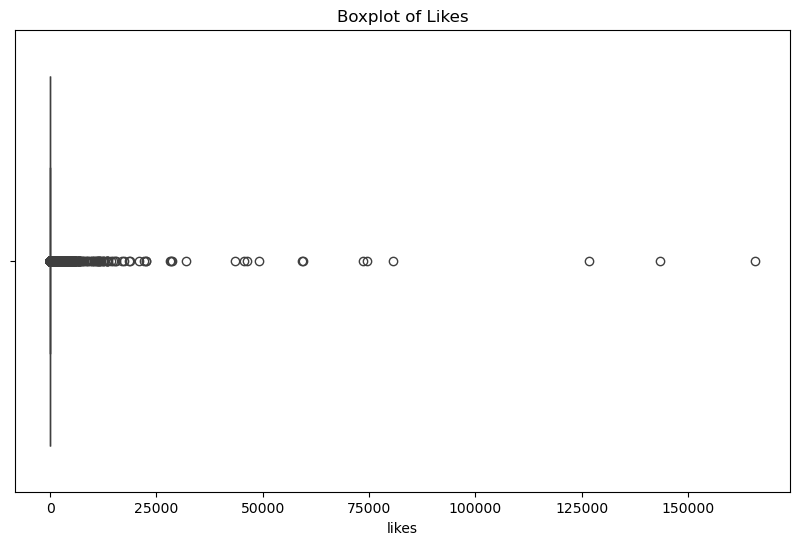

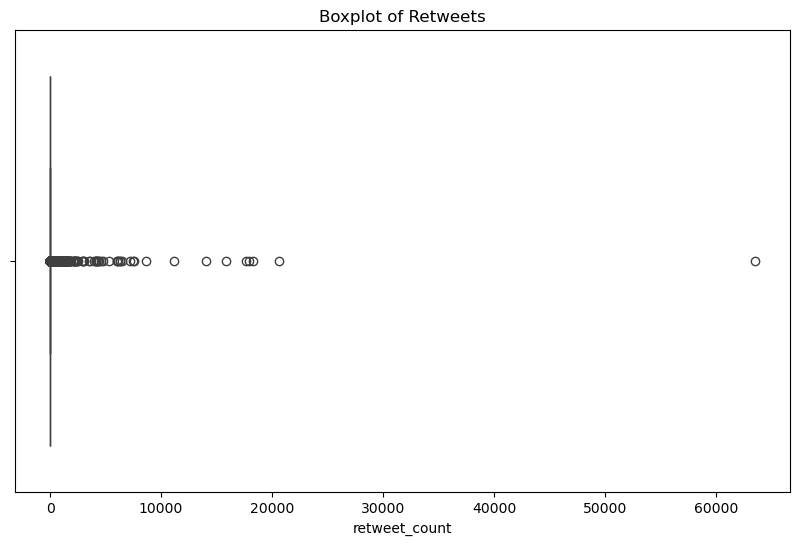

In [44]:
# Boxplot for likes
plt.figure(figsize=(10, 6))
sns.boxplot(x=biden_df['likes'])
plt.title('Boxplot of Likes')
plt.show()

# Boxplot for retweets
plt.figure(figsize=(10, 6))
sns.boxplot(x=biden_df['retweet_count'])
plt.title('Boxplot of Retweets')
plt.show()

## Trump

### Remove irrelevant data

In [56]:
# Remove irrelevant data ("user_name", "user_screen_name", "user_description")
trump_df = trump_df[['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at']]

In [57]:
# Apply language detection to the "tweet" column 
trump_df['language'] = trump_df['tweet'].apply(detect_language)

# Filter rows that are not in English
trump_df = trump_df[trump_df['language'] == 'en'].drop(columns=['language'])

### Ensure Data Consistency

In [58]:
# Identify date-like entries in the "created_at" column
is_date_trump = pd.to_datetime(trump_df["created_at"], errors="coerce").notna()

In [59]:
# Filter only date-like entries and store it in the original dataframe
trump_df = trump_df[is_date_trump]

In [60]:
# Apply function to Standardize timestamps to a consistent timezone
trump_df = standardize_timezone(trump_df, 'created_at', current_timezone='America/New_York')
trump_df = standardize_timezone(trump_df, 'user_join_date', current_timezone='America/New_York')
trump_df = standardize_timezone(trump_df, 'collected_at', current_timezone='America/New_York')

In [61]:
# Apply function to convert columns to numeric
trump_df = convert_columns_to_numeric(trump_df, columns_to_convert_numeric)

In [62]:
# Applt function to convert columns to int
trump_df = convert_columns_to_int(trump_df, columns_to_convert_int)

In [63]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436288 entries, 1 to 971085
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   created_at            435751 non-null  datetime64[ns, UTC]
 1   tweet_id              436288 non-null  int64              
 2   tweet                 436288 non-null  object             
 3   likes                 436288 non-null  int64              
 4   retweet_count         436288 non-null  int64              
 5   source                436169 non-null  object             
 6   user_id               436288 non-null  int64              
 7   user_join_date        436166 non-null  datetime64[ns, UTC]
 8   user_followers_count  436288 non-null  int64              
 9   user_location         301250 non-null  object             
 10  lat                   210371 non-null  float64            
 11  long                  210371 non-null  float64           

In [66]:
# return the names of object columns
trump_text_columns_to_convert = trump_df.select_dtypes(include=['object']).columns.tolist()
trump_df = clean_and_convert_text_fields(trump_df, trump_text_columns_to_convert, "tweet")

In [68]:
trump_df.select_dtypes(include=['object'])

,tweet,source,user_location,city,country,continent,state,state_code
1,usa 2020 trump contro facebook e twitter copro...,social mediaset,NaN,NaN,NaN,NaN,NaN,NaN
3,2 hours since last tweet from #trump maybe he ...,trumpytweeter,NaN,NaN,NaN,NaN,NaN,NaN
4,you get a tie and you get a tie #trump s rally...,twitter for iphone,washington dc,washington,united states of america,north america,district of columbia,dc
6,richardmarx glad u got out of the house dick#t...,twitter for iphone,"powell, tn",NaN,NaN,NaN,NaN,NaN
7,deeviousdenise realdonaldtrump nypost there wo...,twitter for iphone,"ohio, usa",NaN,united states of america,north america,ohio,oh
...,...,...,...,...,...,...,...,...
971078,13 emails from #trump and trumpettes today 20 ...,twitter for iphone,valparaiso in team @mlh_holmes,valparaíso,chile,south america,valparaiso region,NaN
971079,unlike mussolini hitler mao lenin amp stalin h...,twitter web app,hong kong,hong kong island,china,asia,hong kong,NaN
971081,earlier this week we got rid of #trump today m...,twitter web app,NaN,NaN,NaN,NaN,NaN,NaN
971083,joe biden why joe biden did winned trump trum...,twitter web app,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
trump_df.shape

(436288, 18)

### Handle Outliers

In [70]:
trump_df.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,4.362880e+05,436288.000000,436288.000000,4.362880e+05,4.362880e+05,210371.000000,210371.000000
mean,1.322223e+18,4.724934,1.006697,4.178453e+17,7.001731e+03,36.757631,-54.520318
std,2.626281e+15,123.055782,29.671845,5.475572e+17,1.237241e+05,17.432032,65.554016
min,1.316529e+18,0.000000,0.000000,0.000000e+00,0.000000e+00,-90.000000,-175.202642
25%,1.319827e+18,0.000000,0.000000,1.740061e+08,5.800000e+01,34.053691,-100.445882
50%,1.323155e+18,0.000000,0.000000,1.880199e+09,3.170000e+02,39.783730,-79.244100
75%,1.324475e+18,1.000000,0.000000,1.021918e+18,1.505000e+03,43.653482,-1.680020
max,1.325589e+18,25987.000000,8731.000000,1.325569e+18,1.393320e+07,90.000000,179.048837


In [71]:
# Apply for both 'likes' and 'retweets'
trump_df['likes_outliers'] = detect_outliers_iqr(trump_df, 'likes')
trump_df['retweets_outliers'] = detect_outliers_iqr(trump_df, 'retweet_count')

In [72]:
trump_df[(trump_df["likes_outliers"]) | (trump_df["retweets_outliers"])]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,likes_outliers,retweets_outliers
1,2020-10-15 04:00:01+00:00,1316529222748430336,usa 2020 trump contro facebook e twitter copro...,26,9,social mediaset,331617619,2011-07-08 17:12:20+00:00,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 04:00:00.373216530+00:00,True,True
4,2020-10-15 04:00:08+00:00,1316529252301451264,you get a tie and you get a tie #trump s rally...,4,3,twitter for iphone,47413798,2009-06-15 23:05:35+00:00,5393,washington dc,38.894992,-77.036558,washington,united states of america,north america,district of columbia,dc,2020-10-21 04:00:01.492866121+00:00,True,True
12,2020-10-15 04:00:26+00:00,1316529328608481280,#trump #presidenttrump #trump2020landslidevict...,3,5,twitter for android,1243315346397966336,2020-03-27 03:14:28+00:00,496,"san diego, ca",32.717421,-117.162771,san diego,united states of america,north america,california,ca,2020-10-21 04:00:04.478598364+00:00,True,True
18,2020-10-15 04:00:55+00:00,1316529449450565632,#trump httpstcoy9p5bzehut,1,1,twitter web app,1083386514816552960,2019-01-10 20:34:08+00:00,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 04:00:06.717897546+00:00,False,True
19,2020-10-15 04:01:08+00:00,1316529506279018496,cnnbrk #trump owes #ricardoaguirre 730000 to p...,3,2,twitter for iphone,194650429,2010-09-24 21:15:43+00:00,101,santa monica beach,47.005211,-88.962910,NaN,united states of america,north america,michigan,mi,2020-10-21 04:00:07.091114077+00:00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971063,2020-11-09 04:58:51+00:00,1325588627594895360,have you know decency #trump gop do you know ...,3,0,twitter web app,48352311,2009-06-18 17:41:48+00:00,3024,"new york, usa",40.712728,-74.006015,new york,united states of america,north america,new york,ny,2020-11-09 22:47:55.833725+00:00,True,False
971069,2020-11-09 04:59:06+00:00,1325588689548959488,realdonaldtrump #trump you have no evidence of...,2,2,twitter for iphone,1234974554184916992,2020-03-04 03:51:11+00:00,5259,"le roy, ny",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 22:47:55.711399+00:00,False,True
971075,2020-11-09 04:59:25+00:00,1325588768448000000,donald trump moscow 1996 shared by oooromanova...,8,3,twitter web app,388137441,2011-10-10 11:52:11+00:00,586,"london, england",51.507322,-0.127647,london,united kingdom,europe,england,eng,2020-11-09 22:47:55.816241+00:00,True,True
971081,2020-11-09 04:59:42+00:00,1325588841546256384,earlier this week we got rid of #trump today m...,7,0,twitter web app,1416796699,2013-05-10 04:21:43+00:00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 22:47:55.984919+00:00,True,False


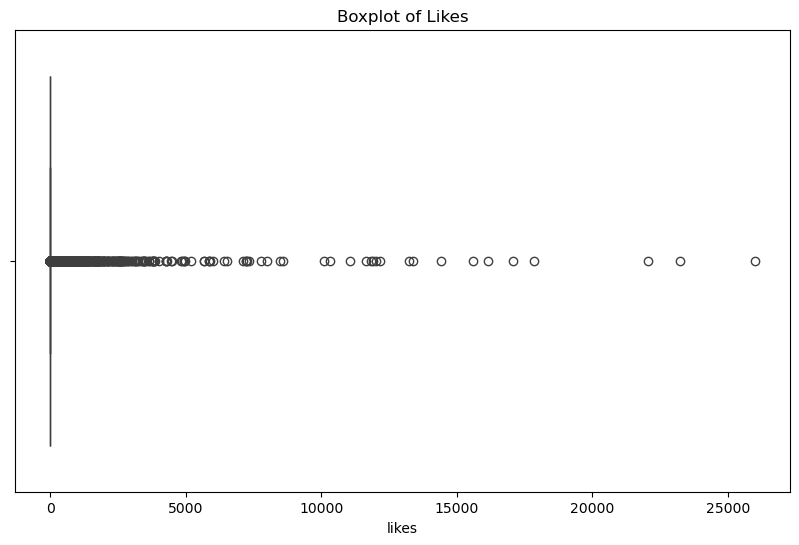

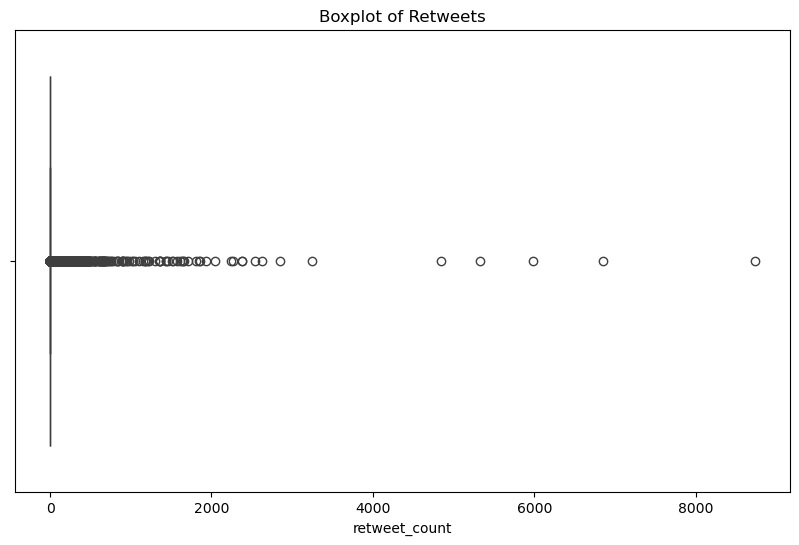

In [73]:
# Boxplot for likes
plt.figure(figsize=(10, 6))
sns.boxplot(x=trump_df['likes'])
plt.title('Boxplot of Likes')
plt.show()

# Boxplot for retweets
plt.figure(figsize=(10, 6))
sns.boxplot(x=trump_df['retweet_count'])
plt.title('Boxplot of Retweets')
plt.show()